In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'sdn_traffic_dataset.csv')

In [3]:
df.shape

(104345, 23)

In [4]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [5]:
df.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
df.Protocol.value_counts()

ICMP    41321
UDP     33588
TCP     29436
Name: Protocol, dtype: int64

In [7]:
df.corr()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
dt,1.000000,-0.006160,-0.175234,-0.291375,0.273140,-0.165584,0.272953,0.330843,0.042411,-0.235173,-0.310792,-0.235291,0.715172,-0.018501,0.080814,0.092080,-0.032566,-0.041620,-0.054373,-0.110126
switch,-0.006160,1.000000,-0.057291,-0.167475,-0.023298,-0.076833,-0.023424,-0.028348,0.199854,-0.036148,-0.112619,-0.036156,0.090251,-0.006665,-0.050381,-0.057712,-0.032836,-0.039025,-0.050972,0.028027
pktcount,-0.175234,-0.057291,1.000000,0.676926,0.024017,0.034668,0.024079,-0.257940,0.275956,0.469584,0.290847,0.469615,-0.086421,0.004171,0.024890,0.028576,0.001352,0.002328,0.003054,0.401894
bytecount,-0.291375,-0.167475,0.676926,1.000000,0.038026,0.029862,0.038028,-0.246348,-0.123280,0.333901,0.533224,0.333924,-0.390266,-0.012527,0.004951,0.005869,0.048198,0.058850,0.076920,0.277481
dur,0.273140,-0.023298,0.024017,0.038026,1.000000,-0.055804,0.999998,0.177488,-0.124786,-0.329818,-0.260732,-0.330080,0.182416,0.000706,0.155276,0.177284,-0.140111,-0.166916,-0.218143,-0.098479
dur_nsec,-0.165584,-0.076833,0.034668,0.029862,-0.055804,1.000000,-0.054438,-0.010362,-0.058871,0.043195,0.047172,0.043197,-0.210022,0.020679,0.007711,0.008859,-0.035466,-0.042023,-0.054903,0.029064
tot_dur,0.272953,-0.023424,0.024079,0.038028,0.999998,-0.054438,1.000000,0.177489,-0.124864,-0.329797,-0.260720,-0.330059,0.182166,0.000745,0.155317,0.177332,-0.140192,-0.167011,-0.218268,-0.098491
flows,0.330843,-0.028348,-0.257940,-0.246348,0.177488,-0.010362,0.177489,1.000000,0.046633,-0.213769,-0.248114,-0.213898,0.393530,0.034105,0.167647,0.191567,0.156891,0.183821,0.240285,-0.182174
packetins,0.042411,0.199854,0.275956,-0.123280,-0.124786,-0.058871,-0.124864,0.046633,1.000000,0.185628,-0.105359,0.185690,0.267852,-0.000179,0.107550,0.123259,0.037548,0.044762,0.058529,-0.002642
pktperflow,-0.235173,-0.036148,0.469584,0.333901,-0.329818,0.043195,-0.329797,-0.213769,0.185628,1.000000,0.813386,0.999999,-0.173475,0.002151,-0.054403,-0.062198,0.104102,0.124257,0.162416,0.087819


In [8]:
df.isna().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [9]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [10]:
df.dropna(inplace=True)
df.isna().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [11]:
df.drop(['dt', 'switch', 'src', 'dst'],axis=1,inplace=True)
df.head()

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [12]:
df.shape

(103839, 19)

In [13]:
df.dtypes

pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

In [14]:
df.Protocol.unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [15]:
df["Protocol"].value_counts()

ICMP    41321
UDP     33082
TCP     29436
Name: Protocol, dtype: int64

In [16]:
df.label.unique()

array([0, 1], dtype=int64)

In [17]:
####df=pd.get_dummies(df)

In [18]:
df.sample(10)

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
99418,421,41258,431,575000000,4.320000e+11,11,3421,29,2842,0,0,ICMP,2,5344,1472,0,0.0,0.0,0
87724,579,56742,593,146000000,5.930000e+11,7,4920,29,2842,0,1,ICMP,2,6003,1632,0,0.0,0.0,0
86471,478,46844,493,174000000,4.930000e+11,4,2997,30,2940,1,1,ICMP,3,114670676,54096,2432,0.0,2432.0,0
12475,76508,81557528,169,286000000,1.690000e+11,5,1298,13585,14481610,452,0,UDP,1,3514,1172,0,0.0,0.0,0
40384,96638,6378252,294,38000000,2.940000e+11,4,16567,9994,659604,333,1,TCP,2,5962431,146195060,0,0.0,0.0,0
59051,691,67718,708,350000000,7.080000e+11,3,3024,29,2842,0,1,ICMP,2,135534529,74991,0,0.0,0.0,0
13559,84408,87953136,270,865000000,2.710000e+11,6,1943,9334,9726028,311,0,UDP,1,3795,1242,0,0.0,0.0,1
50128,215,21070,221,100000000,2.210000e+11,7,2790,29,2842,0,1,ICMP,2,5563,1382,0,0.0,0.0,0
63491,703,68894,720,192000000,7.200000e+11,5,1065,30,2940,1,1,ICMP,1,4940,1312,0,0.0,0.0,0
97827,206,20188,211,534000000,2.120000e+11,13,3421,29,2842,0,0,ICMP,4,19407280,189254882,2529,5058.0,7587.0,0


In [19]:
##standardlize

In [20]:
df.columns

Index(['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object')

In [21]:
df["Protocol"]

0          UDP
1          UDP
2          UDP
3          UDP
4          UDP
          ... 
104340    ICMP
104341    ICMP
104342    ICMP
104343    ICMP
104344    ICMP
Name: Protocol, Length: 103839, dtype: object

In [22]:
protocol=df["Protocol"]

In [23]:
tempdf=df

In [24]:
##col=df.columns

In [25]:
tempdf.drop(["Protocol"],axis=1,inplace=True)

In [26]:
tempdf.shape

(103839, 18)

In [27]:
scaler=MinMaxScaler()

In [28]:
df_std =scaler.fit_transform(tempdf)


In [29]:
df_std.shape

(103839, 18)

In [30]:
##df_std

In [31]:
new_df = pd.DataFrame(df_std, columns=tempdf.columns)

In [32]:
new_df

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,0.996744,0.962430,0.0,0.50,1.133295e-01,3.090061e-06,0.000000,0.00000,0.000000,0.0
1,0.486123,0.915781,0.148857,0.734735,0.149468,0.000000,0.076883,0.962304,0.996717,0.962430,0.0,0.75,1.035450e-06,2.689292e-06,0.000000,0.00000,0.000000,0.0
2,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,0.996737,0.962430,0.0,0.00,9.984414e-07,3.896647e-07,0.000000,0.00000,0.000000,0.0
3,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,0.996737,0.962430,0.0,0.25,9.141880e-07,6.420382e-07,0.000000,0.00000,0.000000,0.0
4,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,0.996737,0.962430,0.0,0.50,6.976491e-07,2.835669e-06,0.000000,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103834,0.000304,0.000053,0.043062,0.842843,0.043533,0.200000,0.000238,0.872365,0.907365,0.872302,0.0,0.00,9.985988e-06,1.197664e-05,0.000049,0.00006,0.000097,0.0
103835,0.000304,0.000053,0.043062,0.842843,0.043533,0.200000,0.000238,0.872365,0.907365,0.872302,0.0,0.50,9.899373e-06,1.396837e-05,0.000049,0.00006,0.000097,0.0
103836,0.000119,0.000021,0.016481,0.805806,0.016918,0.200000,0.000238,0.872371,0.907365,0.872502,0.0,0.25,6.944994e-07,2.902295e-06,0.000000,0.00000,0.000000,0.0
103837,0.000119,0.000021,0.016481,0.805806,0.016918,0.200000,0.000238,0.872371,0.907365,0.872502,0.0,0.00,9.985988e-06,1.197664e-05,0.000049,0.00006,0.000097,0.0


In [33]:
protocol.shape

(103839,)

In [34]:
new_df["Protocol"]=protocol

In [35]:
new_df.shape

(103839, 19)

In [36]:
new_df

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,Protocol
0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,0.996744,0.962430,0.0,0.50,1.133295e-01,3.090061e-06,0.000000,0.00000,0.000000,0.0,UDP
1,0.486123,0.915781,0.148857,0.734735,0.149468,0.000000,0.076883,0.962304,0.996717,0.962430,0.0,0.75,1.035450e-06,2.689292e-06,0.000000,0.00000,0.000000,0.0,UDP
2,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,0.996737,0.962430,0.0,0.00,9.984414e-07,3.896647e-07,0.000000,0.00000,0.000000,0.0,UDP
3,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,0.996737,0.962430,0.0,0.25,9.141880e-07,6.420382e-07,0.000000,0.00000,0.000000,0.0,UDP
4,0.347427,0.654498,0.106326,0.744745,0.106915,0.066667,0.076883,0.962324,0.996737,0.962430,0.0,0.50,6.976491e-07,2.835669e-06,0.000000,0.00000,0.000000,0.0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103834,0.000304,0.000053,0.043062,0.842843,0.043533,0.200000,0.000238,0.872365,0.907365,0.872302,0.0,0.00,9.985988e-06,1.197664e-05,0.000049,0.00006,0.000097,0.0,ICMP
103835,0.000304,0.000053,0.043062,0.842843,0.043533,0.200000,0.000238,0.872365,0.907365,0.872302,0.0,0.50,9.899373e-06,1.396837e-05,0.000049,0.00006,0.000097,0.0,ICMP
103836,0.000119,0.000021,0.016481,0.805806,0.016918,0.200000,0.000238,0.872371,0.907365,0.872502,0.0,0.25,6.944994e-07,2.902295e-06,0.000000,0.00000,0.000000,0.0,ICMP
103837,0.000119,0.000021,0.016481,0.805806,0.016918,0.200000,0.000238,0.872371,0.907365,0.872502,0.0,0.00,9.985988e-06,1.197664e-05,0.000049,0.00006,0.000097,0.0,ICMP


Lable encoding

In [37]:
new_df.Protocol.unique()

array(['UDP', nan, 'TCP', 'ICMP'], dtype=object)

In [38]:
new_df=new_df.dropna()

In [39]:
new_df.Protocol.unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [40]:
new_df.shape

(103333, 19)

In [41]:
lable_encoder=LabelEncoder()

In [42]:
new_df["Protocol"]=lable_encoder.fit_transform(new_df["Protocol"])

<ipython-input-42-eef99a4b306b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Protocol"]=lable_encoder.fit_transform(new_df["Protocol"])


In [43]:
new_df.Protocol.unique()

array([2, 1, 0])

In [44]:
x=new_df.loc[:, new_df.columns != "Protocol"]

In [45]:
y=new_df["Protocol"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
def kmean():
    km = KMeans(n_clusters=3)
    km.fit(x_train,y_train)
    y_pred= km.predict(x_test)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #y_pred = model_selection.cross_val_score(km, x_train, y_train, cv=kfold, scoring=scoring)
    score=accuracy_score(y_test,y_pred)
    print("\nK_Means\nAccuracy Score: ",+score)
    
    return score 

In [61]:
def svm():
    classifier=SVC(kernel="linear")
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #y_pred = model_selection.cross_val_score(classifier, x_train, y_train, cv=kfold, scoring=scoring)
    score=accuracy_score(y_test,y_pred)
    print("\nSupport Vector Machine\nAccuracy Score: ",+score)
    #plt.scatter(y_test,y_pred)
    #plt.xlabel('True Values ')
    #plt.ylabel('Predictions ')
    #plt.show()
    return score    

In [62]:
def random():
    model = RandomForestClassifier(n_estimators=5)
    model1= BaggingClassifier(base_estimator=model, n_estimators=7, random_state=41)
    results_model = model1.fit(x_train,y_train)
    y_pred1= results_model.predict(x_test)
    score=accuracy_score(y_test,y_pred1)
    print("\nRandom Forest\nAccuracy Score: ",+score)
    
    return score    

In [63]:
def knn():
    model= KNeighborsClassifier()
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print("\nKNeighbour\nAccuracy Score: ",+score)
    
    return score   

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation

# model = Sequential([
#     Dense(2048, input_shape=(18,), activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),
#     Dense(1024, activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     Dense(1024, activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     BatchNormalization(),
#     Activation('relu'),
#     Dense(1, activation='softmax')
# ])

In [66]:
# model.summary()

In [67]:
# es = EarlyStopping(
#     monitor='val_accuracy', 
#     mode='max',
#     patience=5,
#     restore_best_weights=True
# )

In [68]:
# model.compile(loss='binary_crossentropy', 
#               optimizer='Adam', 
#               metrics=['accuracy'])

In [69]:
# model.fit(x_train, 
#           y_train, 
#           epochs=30,
#           batch_size=250, 
#           verbose=1, 
#           validation_split=0.2,)
#           #callbacks=[es])

In [70]:
# cnn=tf.keras.models.Sequential()

# #Convolution

# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu', input_shape=(18,)))

# #Pooling

# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# #Adding one more Convolution layer

# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

# # Adding one more Pooling Layer

# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# #Flatening

# cnn.add(tf.keras.layers.Flatten())

# #Full Connection Layer

# cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# #Full Connection Layer

# cnn.add(tf.keras.layers.Dense(units=1,activation='relu'))

# #compile the model

# cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# cnn.summary()

In [71]:
###split

In [72]:
names=['kmean','random','svm','knn']

In [73]:
models=[kmean,random,svm,knn]

In [74]:
name=[]
results=[]
m=0
for model in models:
    print("\n")
    r=models[m]()
    results.append(r)
    name.append(m)
    
    print('\n')
    
    m=m+1




K_Means
Accuracy Score:  0.6686505056370059





Random Forest
Accuracy Score:  0.9955484588958242





Support Vector Machine
Accuracy Score:  0.966226351187884





KNeighbour
Accuracy Score:  0.9817099724197996




In [76]:
results

[0.6686505056370059, 0.9955484588958242, 0.966226351187884, 0.9817099724197996]

In [77]:
names

['kmean', 'random', 'svm', 'knn']

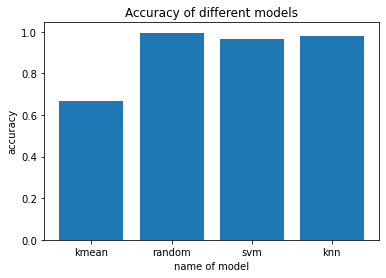

In [87]:
plt.bar(names,results)
plt.xlabel('name of model')
plt.ylabel('accuracy')
plt.title("Accuracy of different models")
plt.savefig("model_accuracy_traffic.jpg")
plt.show()

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [89]:
model = RandomForestClassifier(n_estimators=5)
model1= BaggingClassifier(base_estimator=model, n_estimators=7, random_state=41)
results_model = model1.fit(x_train,y_train)
y_pred1= results_model.predict(x_test)
score=accuracy_score(y_test,y_pred1)
print("\nRandom Forest\nAccuracy Score: ",+score)


Random Forest
Accuracy Score:  0.9955484588958242


In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred1= results_model.predict(x_test)
#preds = np.round(results_model.predict(x_test))

cm=confusion_matrix(y_test, y_pred1)
print (cm)

[[8001   24    0]
 [  40 5991    3]
 [   0   25 6583]]


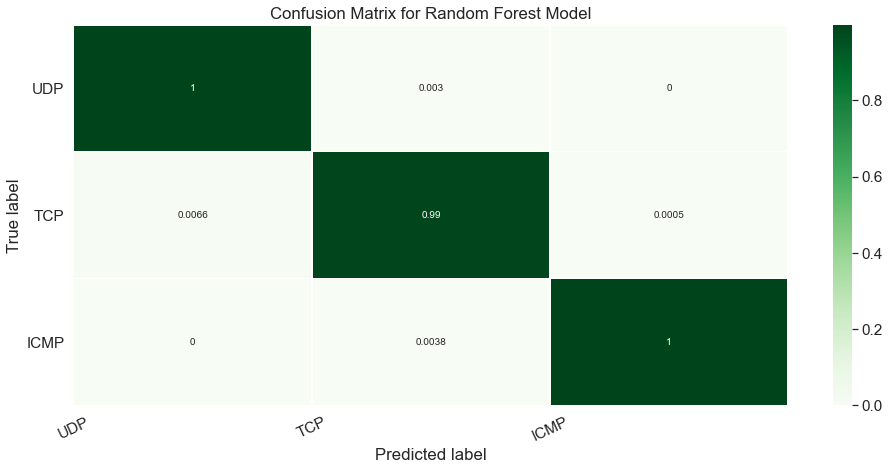

In [96]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['UDP', 'TCP', 'ICMP']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

plt.show()